<p style = 'text-align:center'>
    <a href = 'https://skills.network/?utm_medium = Exinfluencer&utm_source = Exinfluencer&utm_content = 000026UJ&utm_term = 10006555&utm_id = NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01' target = '_blank'>
    <img src = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png' width = '200' alt = 'Skills Network Logo'  />
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


***


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [49]:
import pandas as pd # Python library for data manipulation and analysis.
import numpy as np # high-level mathematical functions to operate on multi-dimensional arrays and matrices
from numpy import float64 # gives us a MatLab like plotting framework.
import matplotlib.pyplot as plt # gives us a MatLab like plotting framework.
from matplotlib.lines import Line2D # gives us a MatLab like plotting framework
import seaborn as sns # provides a high-level interface for drawing attractive and informative statistical graphics

pd.set_option('display.max_columns', None) # allows us to print all collumns of a dataframe
pd.set_option('display.max_colwidth', None) # allows us to print all of the data in a feature

## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [50]:
# If you were unable to complete the previous lab correctly you can uncomment and load this csv
# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
df = pd.read_csv('dataset_part_2.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


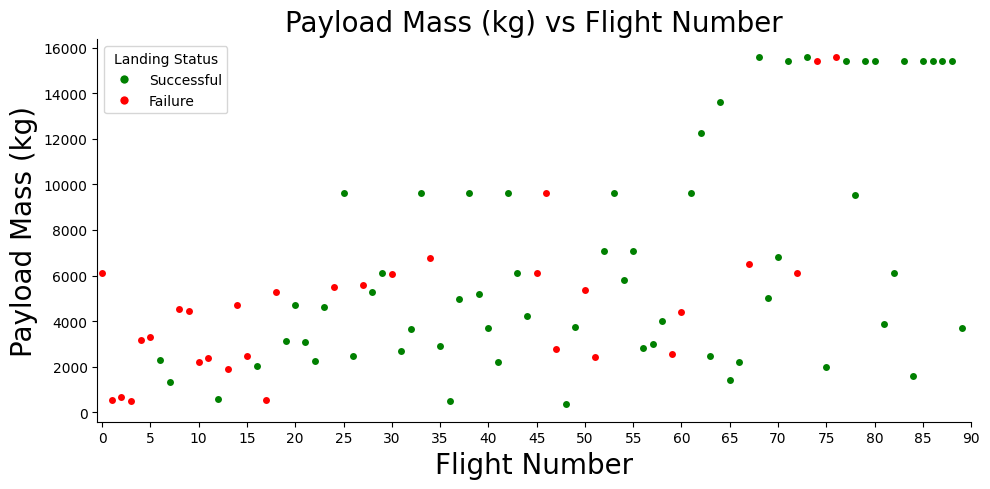

In [51]:
# Plot a Scatter Plot of Payload Mass (kg) vs Flight Number
sns.catplot(x = 'FlightNumber', y = 'PayloadMass', palette = {
                1: 'green', 0: 'red'}, hue = 'Class', data = df, aspect = 2, legend = False)

legend_elements = [Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Successful', markerfacecolor = 'green'),
                    Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Failure', markerfacecolor = 'red')]
plt.legend(handles = legend_elements, title = 'Landing Status', loc = 'best')

x_ticks = (np.arange(0, max(df['FlightNumber'])+1, 5))
plt.xticks(x_ticks, x_ticks)

plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Payload Mass (kg)', fontsize = 20)
title = 'Payload Mass (kg) vs Flight Number'
plt.title(title, fontsize = 20)
plt.tight_layout()

plt.savefig(title+' (Scatter Plot)'+'.png')
plt.show()

We see that different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


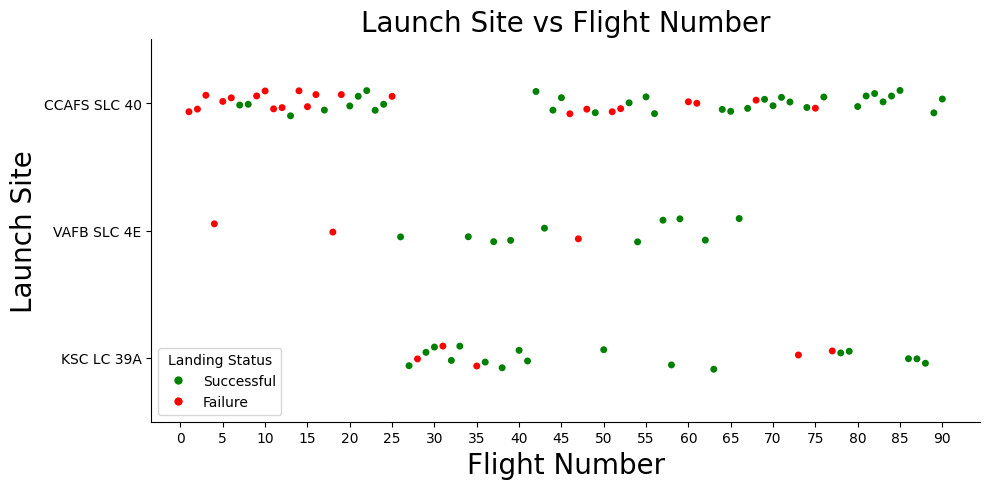

In [52]:
# Plot a Scatter Plot of Launch Site vs Flight Number
sns.catplot(x = 'FlightNumber', y = 'LaunchSite', palette = {
            1: 'green', 0: 'red'}, hue = 'Class', data = df, aspect = 2, legend = False)

legend_elements = [Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Successful', markerfacecolor = 'green'),
                    Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Failure', markerfacecolor = 'red')]
plt.legend(handles = legend_elements, title = 'Landing Status', loc = 'best')

x_ticks = (np.arange(0, max(df['FlightNumber'])+1, 5))
plt.xticks(x_ticks, x_ticks)

plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Launch Site', fontsize = 20)
title = 'Launch Site vs Flight Number'
plt.title(title, fontsize = 20)
plt.tight_layout()

plt.savefig(title+' (Scatter Plot)'+'.png')
plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


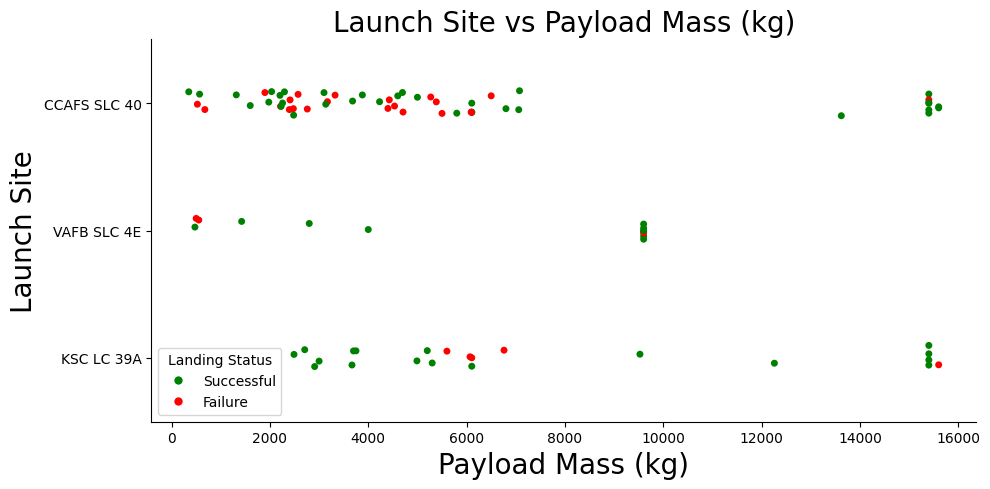

In [53]:
# Plot a Scatter Plot of Launch Site vs Payload Mass (kg)
sns.catplot(x = 'PayloadMass', y = 'LaunchSite', palette = {
            1: 'green', 0: 'red'}, hue = 'Class', data = df, aspect = 2, legend = False)

legend_elements = [Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Successful', markerfacecolor = 'green'),
                    Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Failure', markerfacecolor = 'red')]
plt.legend(handles = legend_elements, title = 'Landing Status', loc = 'best')

plt.xlabel('Payload Mass (kg)', fontsize = 20)
plt.ylabel('Launch Site', fontsize = 20)
title = 'Launch Site vs Payload Mass (kg)'
plt.title(title, fontsize = 20)
plt.tight_layout()

plt.savefig(title+' (Scatter Plot)'+'.png', dpi = 100)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


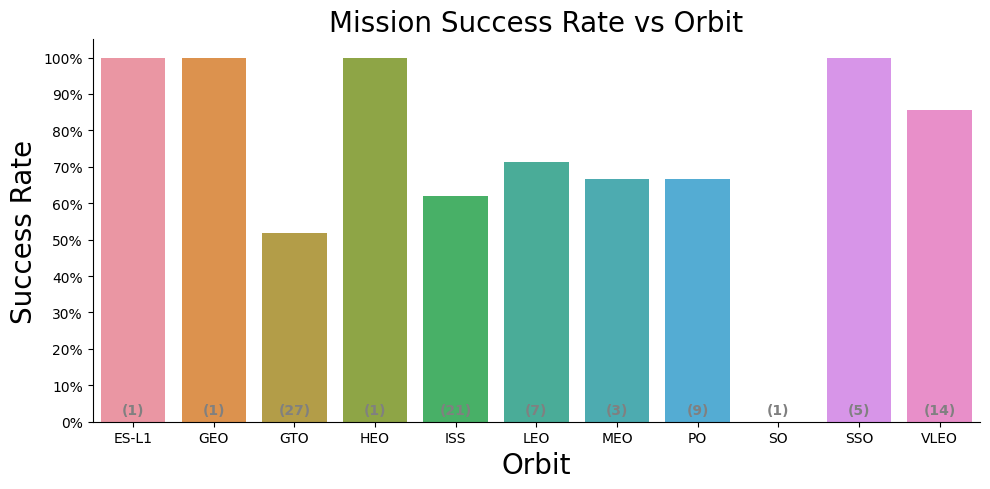

In [54]:
# Plot a Bar Graph of Success Rate vs Orbit
grouped_orbits = df.groupby(['Orbit'], as_index = False)
mean = grouped_orbits.mean()
counts = df['Orbit'].value_counts()

sns.catplot(x = 'Orbit', y = 'Class', data = mean, aspect = 2, kind = 'bar')

plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', 
            '40%','50%', '60%', '70%', '80%', '90%', '100%'])

plt.xlabel('Orbit', fontsize = 20)
plt.ylabel('Success Rate', fontsize = 20)
title = 'Mission Success Rate vs Orbit'
plt.title(title, fontsize = 20)

counts = counts.reindex(mean['Orbit'])
for i, v in enumerate(counts):
    plt.text(i, 0.02, '('+str(v)+')', color = 'grey',
                ha = 'center', fontweight = 'bold')

plt.tight_layout()

plt.savefig(title+' (Bar Graph)'+'.png', dpi = 100)
plt.show()

Analyze the ploted bar chart try to find which orbits have high sucess rate.
#The plotted bar chart shows  the ES-L1, GEO, HEO,  and SSO orbits have high success rates. 


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


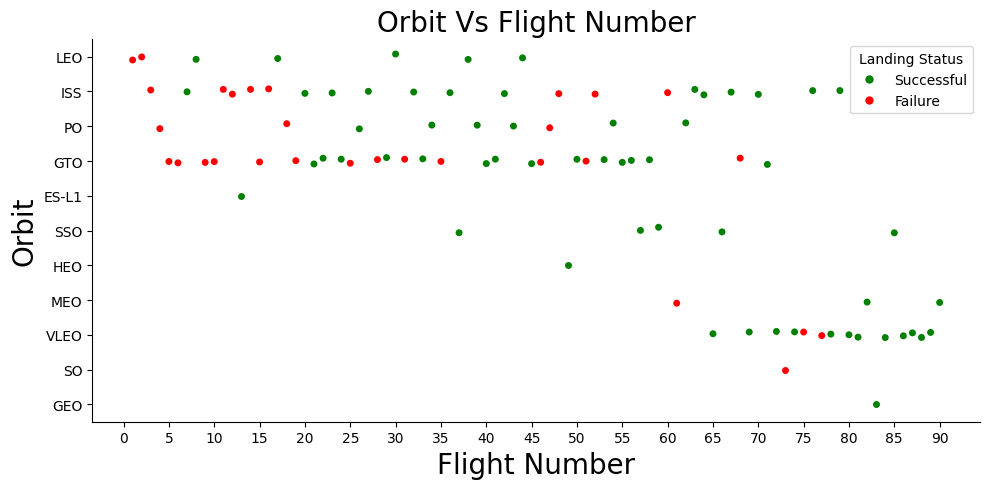

In [55]:
# Plot a Scatter Plot of Orbit Vs Flight Number
sns.catplot(x = 'FlightNumber', y = 'Orbit', palette = {
            1: 'green', 0: 'red'}, hue = 'Class', data = df, aspect = 2, legend = False)

legend_elements = [Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Successful', markerfacecolor = 'green'),
                    Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Failure', markerfacecolor = 'red')]
plt.legend(handles = legend_elements, title = 'Landing Status', loc = 'best')

x_ticks = (np.arange(0, max(df['FlightNumber'])+1, 5))
plt.xticks(x_ticks, x_ticks)

plt.xlabel('Flight Number', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
title = 'Orbit Vs Flight Number'
plt.title(title, fontsize = 20)
plt.tight_layout()

plt.savefig(title+' (Scatter Plot)'+'.png', dpi = 100)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


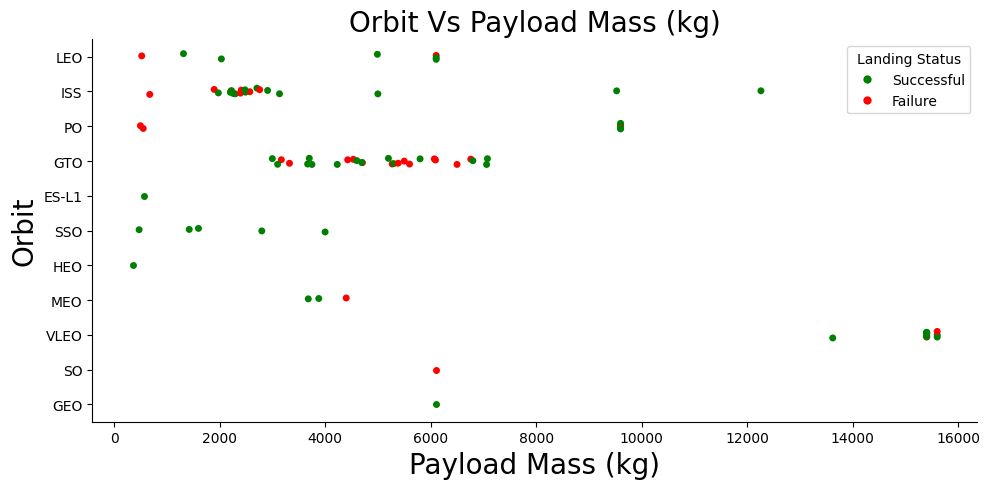

In [56]:
# Plot a Scatter Plot of Orbit Vs Payload Mass (kg)
sns.catplot(x = 'PayloadMass', y = 'Orbit', palette = {
            1: 'green', 0: 'red'}, hue = 'Class', data = df, aspect = 2, legend = False)

legend_elements = [Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Successful', markerfacecolor = 'green'),
                    Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Failure', markerfacecolor = 'red')]
plt.legend(handles = legend_elements, title = 'Landing Status', loc = 'best')

plt.xlabel('Payload Mass (kg)', fontsize = 20)
plt.ylabel('Orbit', fontsize = 20)
title = 'Orbit Vs Payload Mass (kg)'
plt.title(title, fontsize = 20)
plt.tight_layout()

plt.savefig(title+' (Scatter Plot)'+'.png', dpi = 100)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.
However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [57]:
# Extract year from date and add to df
year = []

def Extract_year(date):
    for i in df['Date']:
        year.append(i.split('-')[0])
    return year

df['Year'] = Extract_year(df['Date'])

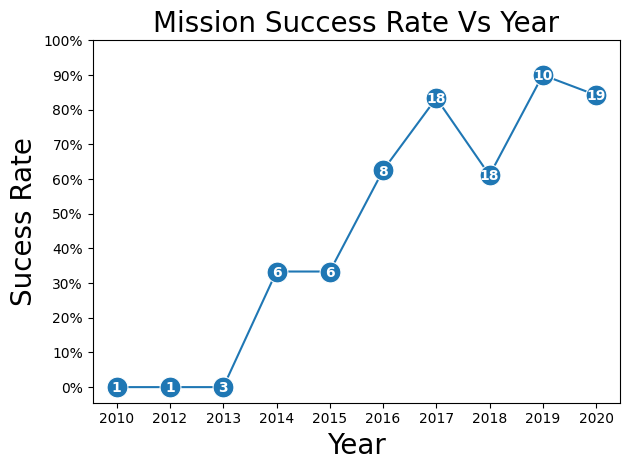

In [58]:
# Plot a Line Chart of launch success yearly trend
grouped_dates = df.groupby(['Year'], as_index = False)
mean = grouped_dates.mean()
counts = df['Year'].value_counts()

sns.lineplot(x = 'Year', y = 'Class', data = mean,
                markers = True, marker = 'o', markersize = 15)
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%',
            '50%', '60%', '70%', '80%', '90%', '100%'])

counts = counts.reindex(mean['Year'])
for i, v in enumerate(counts):
    plt.text(mean.Year[i], mean.Class[i]-.015,
                str(v), color = 'white', ha = 'center', fontweight = 'bold')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('Sucess Rate', fontsize = 20)
title = 'Mission Success Rate Vs Year'
plt.title(title, fontsize = 20)
plt.tight_layout()

plt.savefig(title+' (Line Chart)'+'.png', dpi = 100)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [59]:
# select features that will be used in success prediction
features_df = df[['FlightNumber', 'Year', 'PayloadMass',
                    'Orbit', 'LaunchSite', 'Class']]
features_df.head()

,FlightNumber,Year,PayloadMass,Orbit,LaunchSite,Class
0,1,2010,6104.959412,LEO,CCAFS SLC 40,0
1,2,2012,525.000000,LEO,CCAFS SLC 40,0
2,3,2013,677.000000,ISS,CCAFS SLC 40,0
3,4,2013,500.000000,PO,VAFB SLC 4E,0
4,5,2013,3170.000000,GTO,CCAFS SLC 40,0


### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [60]:
# select features that will be used in success prediction
features_df = df[['FlightNumber', 'Year', 'PayloadMass',
                    'Orbit', 'LaunchSite', 'Class']]

# Create dummy variables to categorical columns
features_one_hot = pd.get_dummies(features_df)
features_one_hot.head()

,FlightNumber,PayloadMass,Class,Year_2010,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,1,6104.959412,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,525.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,3,677.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,500.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,5,3170.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### TASK  8: Cast all numeric columns to `float64`

Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [61]:
# Cast all columns to `float64`
features_one_hot.astype(float64)

,FlightNumber,PayloadMass,Class,Year_2010,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Year_2020,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,1.0,6104.959412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,525.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,677.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,500.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,3170.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
86,87.0,15400.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
87,88.0,15400.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
88,89.0,15400.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


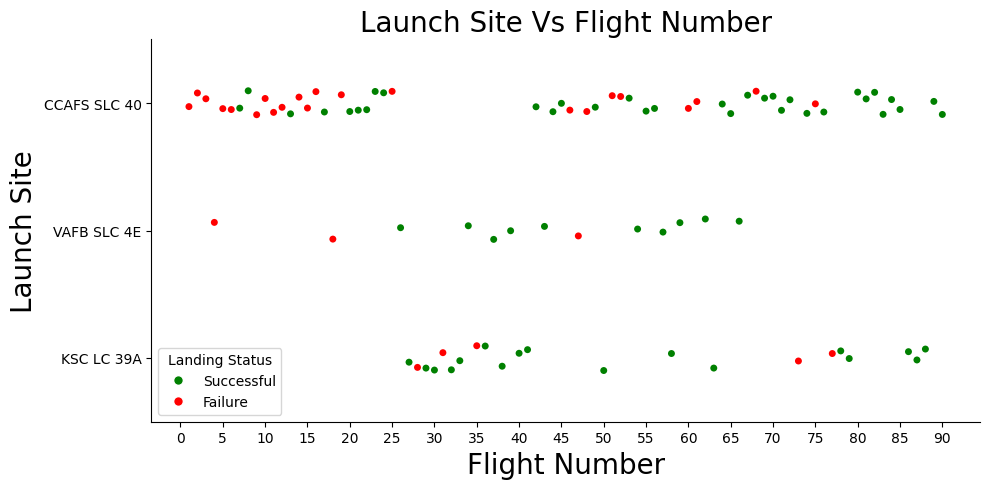

In [62]:
# Plot a Jittered Strip Plot of Launch Site Vs Flight Number
sns.catplot(x = 'FlightNumber', y = 'LaunchSite', palette = {
            1: 'green', 0: 'red'}, hue = 'Class', data = df, aspect = 2, legend = False)

legend_elements = [Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Successful', markerfacecolor = 'green'),
                    Line2D([0], [0], marker = 'o', markersize = 7, color = 'w', label = 'Failure', markerfacecolor = 'red')]
plt.legend(handles = legend_elements, title = 'Landing Status', loc = 'best')

x_ticks = (np.arange(0, max(df['FlightNumber'])+1, 5))
plt.xticks(x_ticks, x_ticks)

plt.ylabel('Launch Site', fontsize = 20)
plt.xlabel('Flight Number', fontsize = 20)
title = 'Launch Site Vs Flight Number'
plt.title(title, fontsize = 20)
plt.tight_layout()

plt.savefig(title+' (Jittered Strip Plot)'+'.png', dpi = 100)
plt.show()

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


In [63]:
# Save Data to CSV
features_one_hot.to_csv('dataset_part_3.csv', index = False)
features_df.to_csv('features.csv', index = False)

## Authors


<a href = 'https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium = Exinfluencer&utm_source = Exinfluencer&utm_content = 000026UJ&utm_term = 10006555&utm_id = NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href = 'https://www.linkedin.com/in/nayefaboutayoun/?utm_medium = Exinfluencer&utm_source = Exinfluencer&utm_content = 000026UJ&utm_term = 10006555&utm_id = NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01'>Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |
| 2020-11-10        | 1.1     | Nayef         | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
